<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Teansfer%20Learning/Transfer_Learning_in_Tensorflow_Scaling_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning with Tensorflow : Scaling Up

In [1]:
!nvidia-smi

Sun Jan 29 17:12:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    24W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1. Helper Functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-01-29 17:12:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-29 17:12:17 (74.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

## 2. Importing Dataset

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2023-01-29 17:12:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.16.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   141MB/s    in 11s     

2023-01-29 17:12:32 (137 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [5]:
unzip_data("101_food_classes_10_percent.zip")

In [6]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/clam_chowder'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/gyoza'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/apple_pie'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/risotto'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/grilled_cheese_sandwich'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/donuts'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/strawberry_shortcake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/falafel'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in 

In [7]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

## 3. Data Loaders

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data = image_dataset_from_directory(directory = train_dir,
image_size = IMG_SIZE,batch_size = BATCH_SIZE,label_mode = "categorical"
)
test_data = image_dataset_from_directory(directory = test_dir,
image_size = IMG_SIZE,batch_size = BATCH_SIZE,label_mode = "categorical",shuffle = False
)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [9]:
class_names = train_data.class_names

In [10]:
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## 4. Data Augmentation and Checkpoints

In [11]:
checkpoint_path = "101_classes_10_percent_model"
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,monitor = "val_accuracy",save_best_only = True,save_weights_only = True,save_ferq = "epoch")

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
],name = "data_augmentation")


## 5. Feature Extraction Model

In [13]:
# BackBone Model
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Layers
inputs = layers.Input((224,224,3),name = "input_layer")
# Augmentation Layer
x = data_augmentation(inputs)
x = base_model(x,training = False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(101,activation = "softmax",name = "output_layer")(x)
model_0 = tf.keras.Model(inputs,outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [15]:
model_0.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics = ['accuracy'])

In [16]:
history_0 = model_0.fit(train_data,epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = int(0.15*len(test_data)),
            callbacks = [checkpoint]
            )

Epoch 1/5
237/237 [==============================] - 93s 335ms/step - loss: 3.3652 - accuracy: 0.2764 - val_loss: 2.4181 - val_accuracy: 0.4640
Epoch 2/5
237/237 [==============================] - 67s 279ms/step - loss: 2.2085 - accuracy: 0.4960 - val_loss: 2.0300 - val_accuracy: 0.5162
Epoch 3/5
237/237 [==============================] - 58s 245ms/step - loss: 1.8221 - accuracy: 0.5673 - val_loss: 1.8687 - val_accuracy: 0.5315
Epoch 4/5
237/237 [==============================] - 55s 230ms/step - loss: 1.6161 - accuracy: 0.6077 - val_loss: 1.7924 - val_accuracy: 0.5408
Epoch 5/5
237/237 [==============================] - 53s 220ms/step - loss: 1.4550 - accuracy: 0.6416 - val_loss: 1.7633 - val_accuracy: 0.5376


In [17]:
fine_tuning_results = model_0.evaluate(test_data)
fine_tuning_results

790/790 [==============================] - 55s 70ms/step - loss: 1.5934 - accuracy: 0.5758


[1.5933870077133179, 0.5758416056632996]

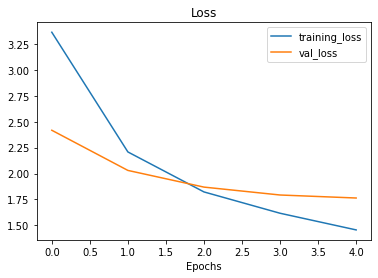

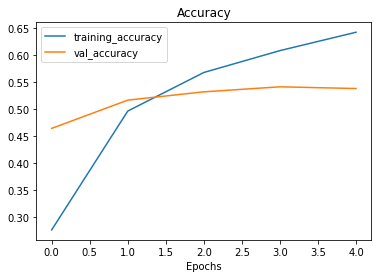

In [18]:
plot_loss_curves(history_0)

## 6. Fine Tuning

### 1. Unfreezing layers in Base Model

In [19]:
base_model.trainable = True
## Refreeze every layers except last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [20]:
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ["accuracy"]
)


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
fine_tune_epochs = 10
history_1 = model_0.fit(train_data,
            epochs = fine_tune_epochs,
            initial_epoch = history_0.epoch[-1],
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = int(0.15*len(test_data))
            )

Epoch 5/10
237/237 [==============================] - 58s 217ms/step - loss: 1.2211 - accuracy: 0.6812 - val_loss: 1.7120 - val_accuracy: 0.5495
Epoch 6/10
237/237 [==============================] - 48s 199ms/step - loss: 1.0897 - accuracy: 0.7122 - val_loss: 1.7176 - val_accuracy: 0.5508
Epoch 7/10
237/237 [==============================] - 48s 202ms/step - loss: 1.0123 - accuracy: 0.7319 - val_loss: 1.7153 - val_accuracy: 0.5503
Epoch 8/10
237/237 [==============================] - 45s 189ms/step - loss: 0.9394 - accuracy: 0.7545 - val_loss: 1.7291 - val_accuracy: 0.5490
Epoch 9/10
237/237 [==============================] - 45s 188ms/step - loss: 0.8896 - accuracy: 0.7585 - val_loss: 1.6980 - val_accuracy: 0.5524
Epoch 10/10
237/237 [==============================] - 43s 180ms/step - loss: 0.8429 - accuracy: 0.7760 - val_loss: 1.6955 - val_accuracy: 0.5535


In [22]:
fine_tuned_results = model_0.evaluate(test_data)
fine_tuned_results

790/790 [==============================] - 55s 69ms/step - loss: 1.5202 - accuracy: 0.5987


[1.520176649093628, 0.5986534357070923]

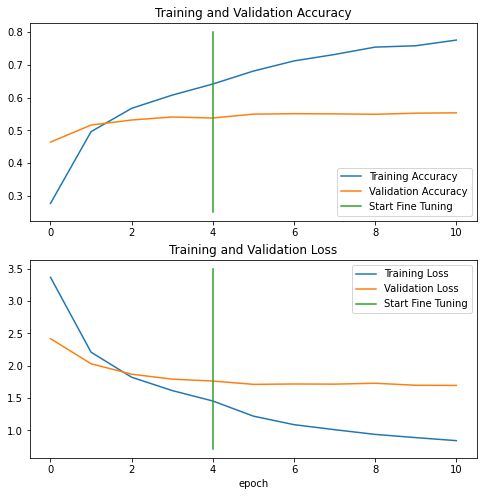

In [23]:
from helper_functions import compare_historys
compare_historys(history_0,history_1,initial_epochs = 5)

## 7. Saving and loading our model

In [24]:
model_0.save("drive/MyDrive/MyModels/101_food_classes_10_percent_saved")

In [25]:
loaded_model = tf.keras.models.load_model("drive/MyDrive/MyModels/101_food_classes_10_percent_saved")

In [26]:
loaded_model.evaluate(test_data)

790/790 [==============================] - 57s 71ms/step - loss: 1.5202 - accuracy: 0.5987


[1.5201770067214966, 0.5986534357070923]

## 8. Evaluating using Pre-Trained Model

In [27]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2023-01-29 17:28:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M   136MB/s    in 0.3s    

2023-01-29 17:28:02 (136 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [28]:
unzip_data("06_101_food_class_10_percent_saved_big_dog_model.zip")

In [29]:
loaded_pretrained_model = tf.keras.models.load_model("06_101_food_class_10_percent_saved_big_dog_model") 

In [30]:
loaded_pretrained_model.evaluate(test_data)

790/790 [==============================] - 67s 83ms/step - loss: 1.8027 - accuracy: 0.6078


[1.8027206659317017, 0.6077623963356018]

## 9.Making Predictions with trained model

In [31]:
preds_probs = model_0.predict(test_data,verbose = 1)

790/790 [==============================] - 62s 76ms/step


In [32]:
test_data.class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [33]:
pred_classes = preds_probs.argmax(axis = 1)
pred_classes[:10]

array([28,  0,  0,  8,  8, 78, 29, 46,  0,  0])

In [34]:
y_labels = []
for images,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_labels,pred_classes)

0.5986534653465346

## Confusion Matrix

In [36]:
class_names = test_data.class_names

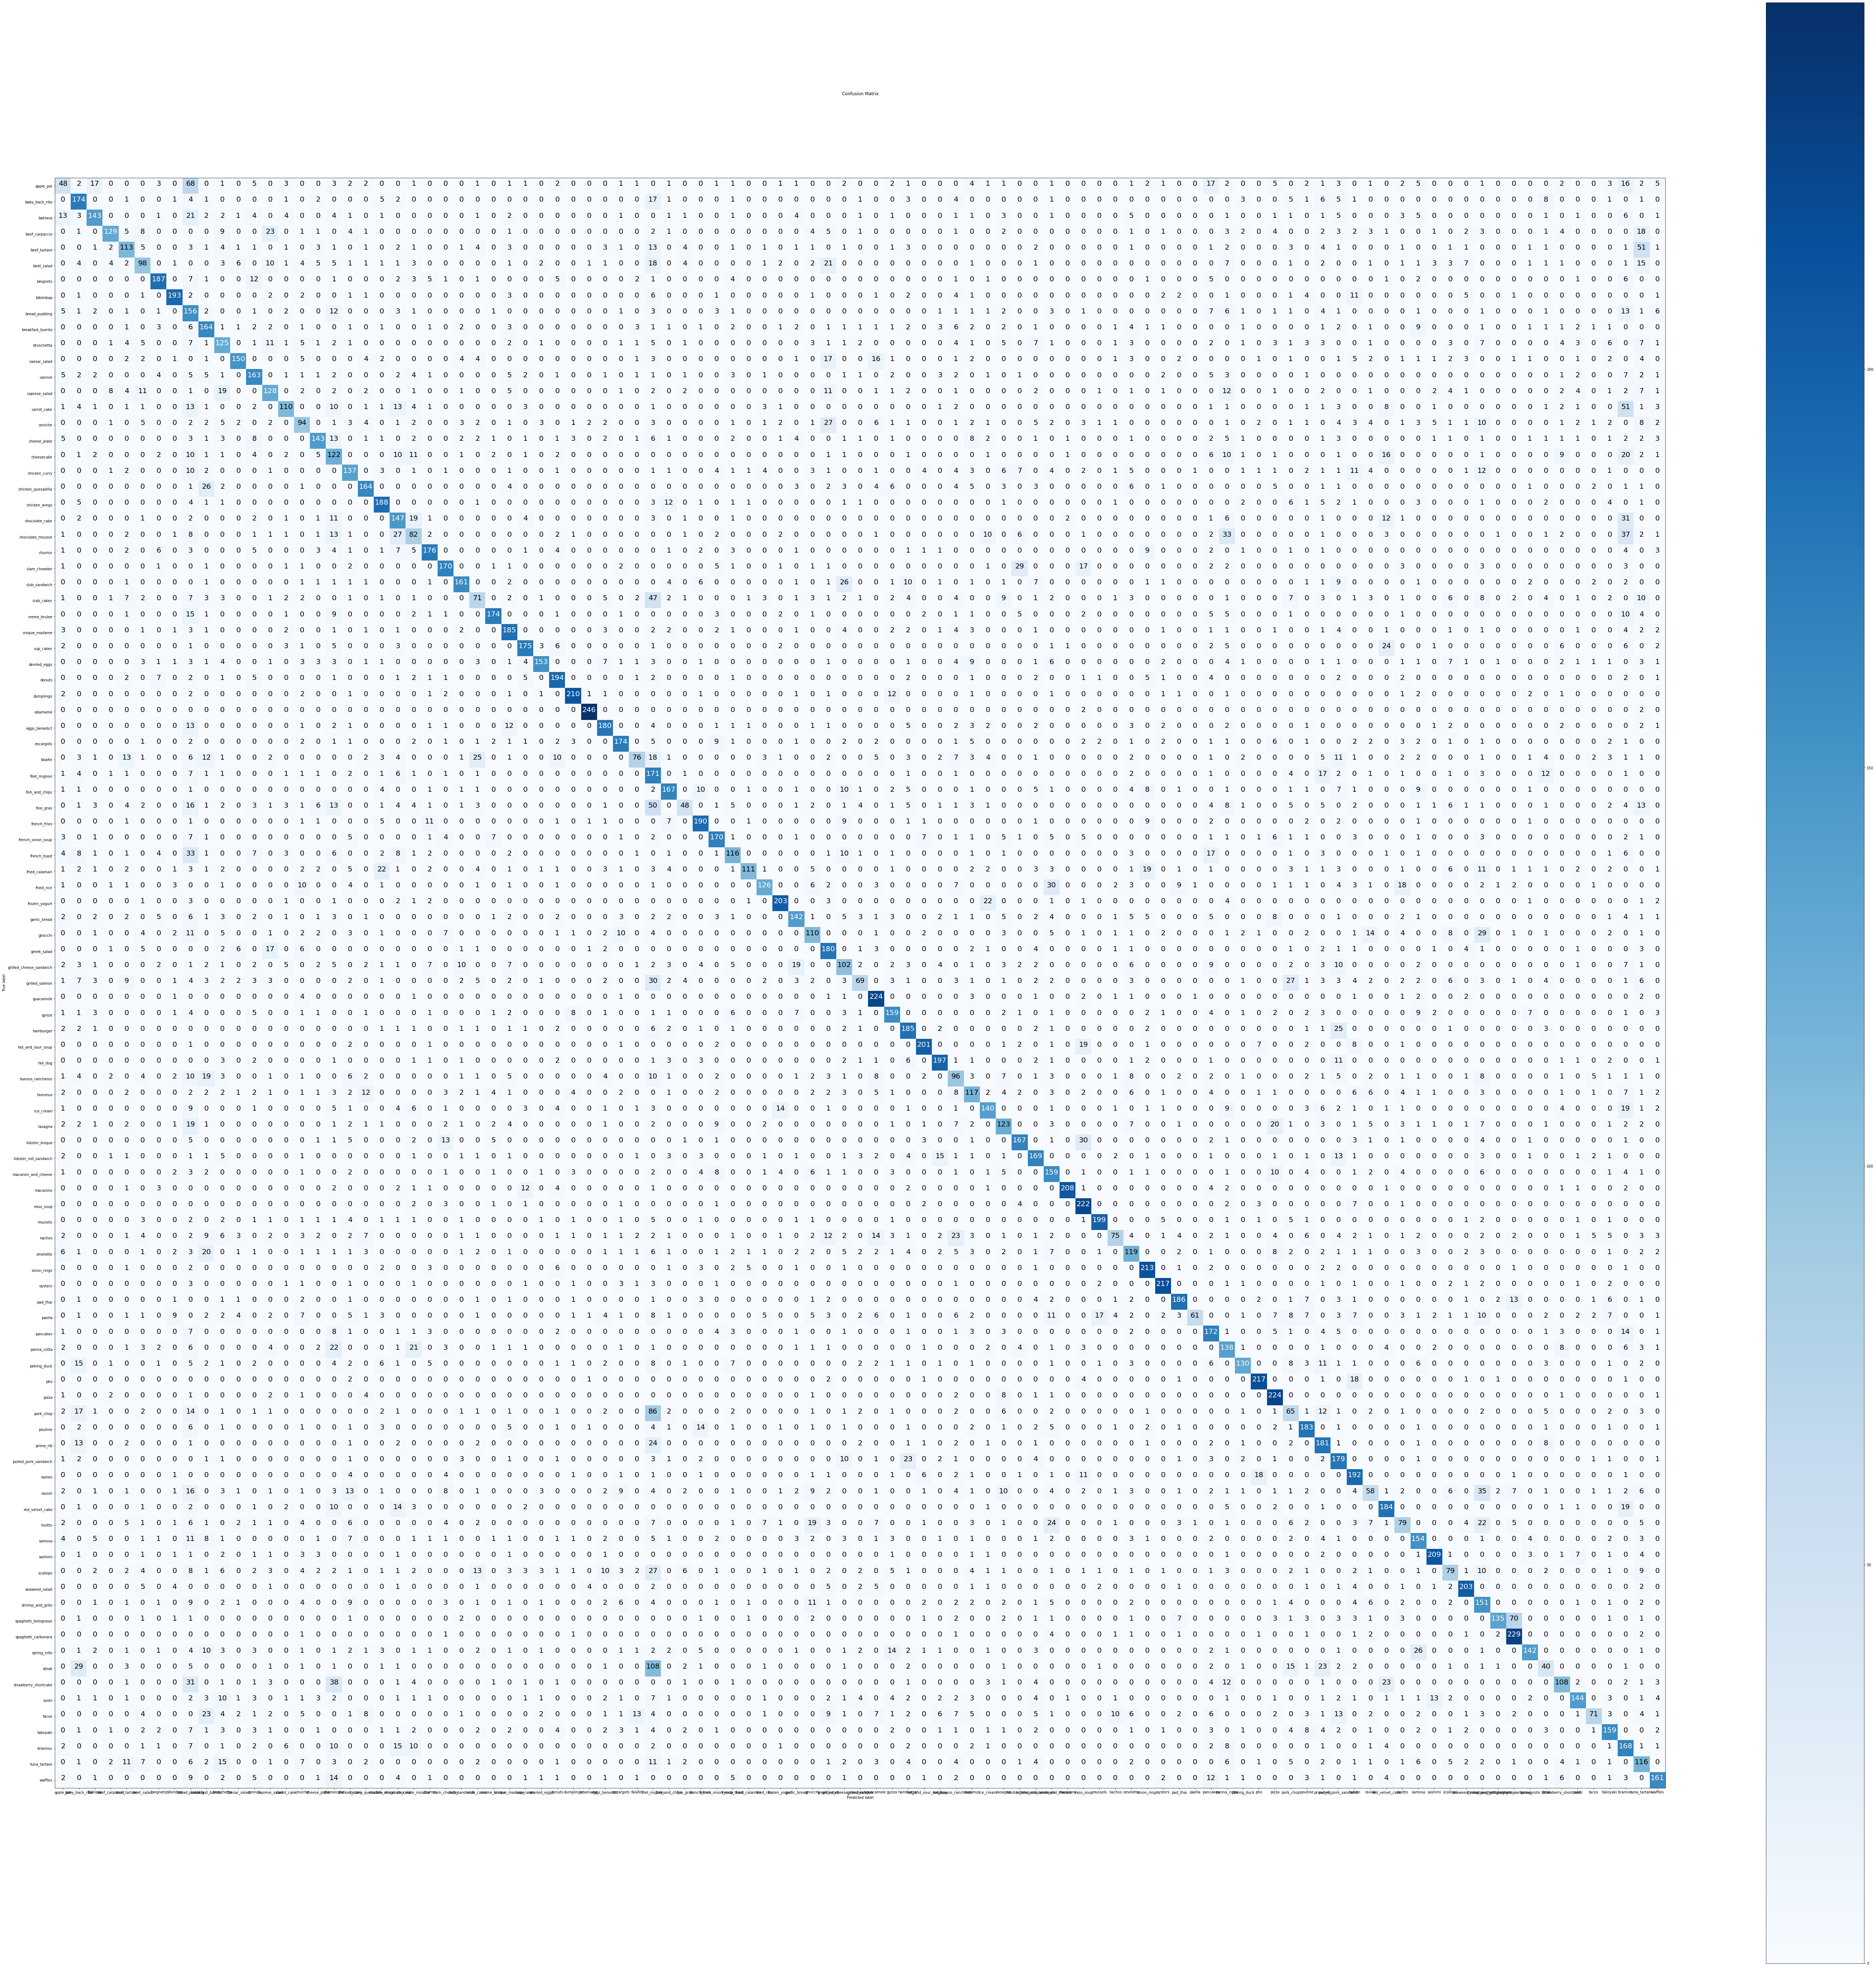

In [39]:
from helper_functions import make_confusion_matrix
make_confusion_matrix(y_true = y_labels,y_pred = pred_classes,classes = class_names,figsize = (100,100),text_size = 20)

## F1-Score Analysis

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_true=y_labels,y_pred = pred_classes))

              precision    recall  f1-score   support

           0       0.34      0.19      0.24       250
           1       0.53      0.70      0.60       250
           2       0.71      0.57      0.63       250
           3       0.81      0.52      0.63       250
           4       0.51      0.45      0.48       250
           5       0.48      0.39      0.43       250
           6       0.78      0.75      0.76       250
           7       0.82      0.77      0.80       250
           8       0.22      0.62      0.32       250
           9       0.47      0.66      0.55       250
          10       0.44      0.50      0.47       250
          11       0.81      0.60      0.69       250
          12       0.60      0.65      0.63       250
          13       0.54      0.51      0.53       250
          14       0.68      0.44      0.54       250
          15       0.45      0.38      0.41       250
          16       0.70      0.57      0.63       250
          17       0.31    

In [42]:
classification_dict = classification_report(y_true=y_labels,y_pred = pred_classes,output_dict = True)

In [43]:
classification_dict

{'0': {'precision': 0.3356643356643357,
  'recall': 0.192,
  'f1-score': 0.24427480916030533,
  'support': 250},
 '1': {'precision': 0.5337423312883436,
  'recall': 0.696,
  'f1-score': 0.6041666666666666,
  'support': 250},
 '2': {'precision': 0.7114427860696517,
  'recall': 0.572,
  'f1-score': 0.6341463414634146,
  'support': 250},
 '3': {'precision': 0.8113207547169812,
  'recall': 0.516,
  'f1-score': 0.6308068459657702,
  'support': 250},
 '4': {'precision': 0.5067264573991032,
  'recall': 0.452,
  'f1-score': 0.4778012684989429,
  'support': 250},
 '5': {'precision': 0.4827586206896552,
  'recall': 0.392,
  'f1-score': 0.43267108167770424,
  'support': 250},
 '6': {'precision': 0.7824267782426778,
  'recall': 0.748,
  'f1-score': 0.7648261758691207,
  'support': 250},
 '7': {'precision': 0.8247863247863247,
  'recall': 0.772,
  'f1-score': 0.7975206611570247,
  'support': 250},
 '8': {'precision': 0.2184873949579832,
  'recall': 0.624,
  'f1-score': 0.3236514522821577,
  'suppor

In [44]:
class_f1_scores = {}
for key,value in classification_dict.items():
  if key== "accuracy":
    break
  else:
    class_f1_scores[class_names[int(key)]] = value['f1-score']

In [45]:
class_f1_scores

{'apple_pie': 0.24427480916030533,
 'baby_back_ribs': 0.6041666666666666,
 'baklava': 0.6341463414634146,
 'beef_carpaccio': 0.6308068459657702,
 'beef_tartare': 0.4778012684989429,
 'beet_salad': 0.43267108167770424,
 'beignets': 0.7648261758691207,
 'bibimbap': 0.7975206611570247,
 'bread_pudding': 0.3236514522821577,
 'breakfast_burrito': 0.545757071547421,
 'bruschetta': 0.4664179104477612,
 'caesar_salad': 0.6880733944954128,
 'cannoli': 0.6257197696737045,
 'caprese_salad': 0.5278350515463919,
 'carrot_cake': 0.5352798053527981,
 'ceviche': 0.408695652173913,
 'cheese_plate': 0.6285714285714286,
 'cheesecake': 0.38125,
 'chicken_curry': 0.5299806576402322,
 'chicken_quesadilla': 0.6804979253112033,
 'chicken_wings': 0.717557251908397,
 'chocolate_cake': 0.532608695652174,
 'chocolate_mousse': 0.3511777301927195,
 'churros': 0.721311475409836,
 'clam_chowder': 0.6981519507186859,
 'club_sandwich': 0.7,
 'crab_cakes': 0.3397129186602871,
 'creme_brulee': 0.7631578947368421,
 'croqu

In [47]:
import pandas as pd
f1_scores = pd.DataFrame({
    "class_names":list(class_f1_scores.keys()),
    "f1-score":list(class_f1_scores.values())
}).sort_values("f1-score",ascending = False)

In [48]:
f1_scores

,class_names,f1-score
33,edamame,0.966601
63,macarons,0.896552
69,oysters,0.862823
75,pho,0.856016
32,dumplings,0.850202
...,...,...
82,ravioli,0.296675
39,foie_gras,0.285714
77,pork_chop,0.282609
0,apple_pie,0.244275


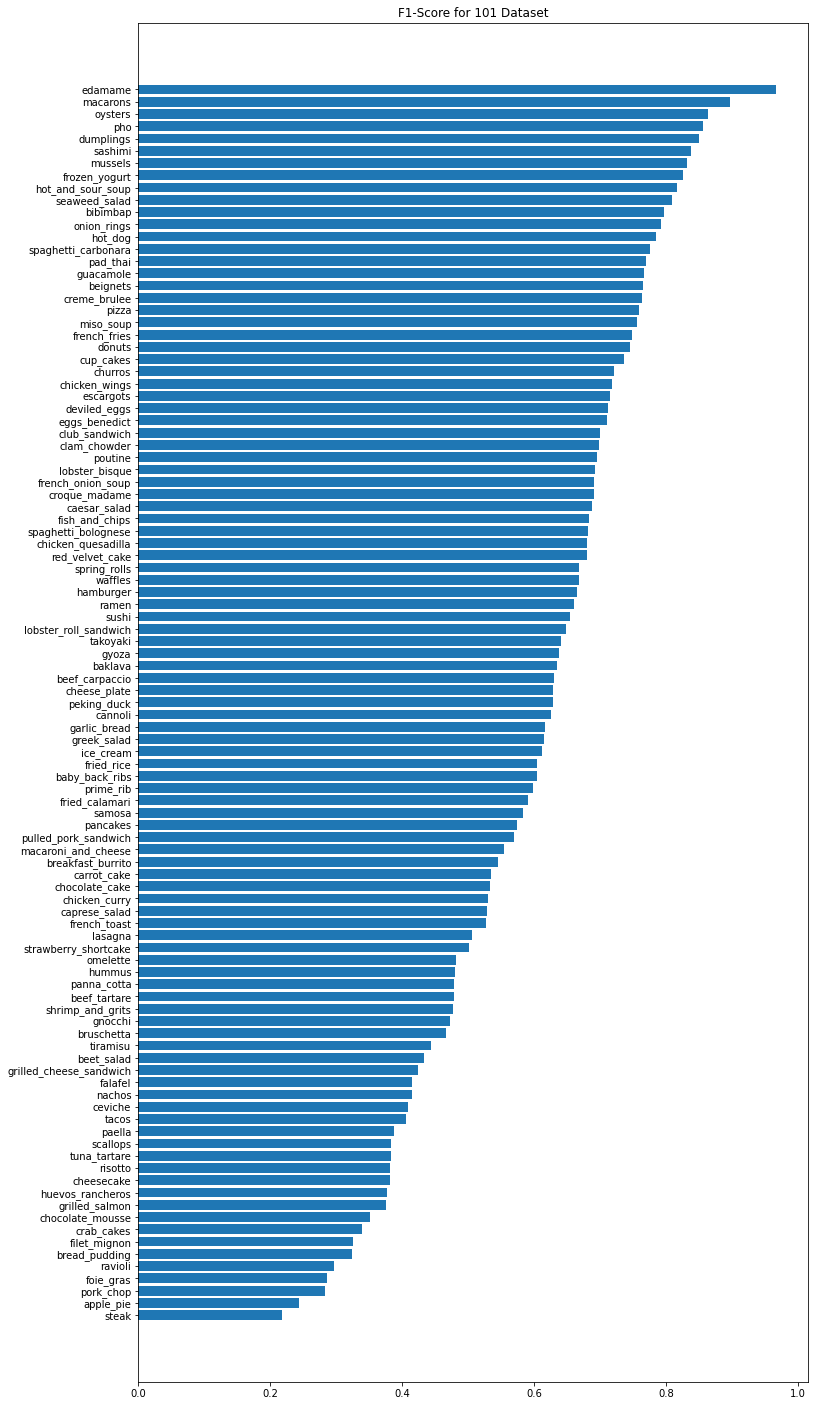

In [54]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (12,25))
scores = ax.barh(range(len(f1_scores)),f1_scores['f1-score'].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores['class_names'])
ax.set_title("F1-Score for 101 Dataset")
ax.invert_yaxis()